In [58]:
import math
import matplotlib.pyplot as plt
import numpy as np

## Quadrupole sound intensity

In [59]:
a = 1     #BASE RADIUS
e = 0.15  
n = 2
d = 0      
t = 4
Ω = 1    #CORE VORTICITY

ρ0 = 0.5 # MEAN DENSITY OUTSIDE
ρ1 = 0.7 # MEAN DENSITY INSIDE CORE

In [60]:
# SOUND FREQUENCY

w = (Ω/2)*(n - ((ρ1 - math.sqrt(n*(ρ0**2) - (n-1)*(ρ1**2)))/(ρ0 +  ρ1 ))) 

In [61]:
#VORTEX GEOMETRY

r = a*(1 + e*math.cos(n*d  - w*t))

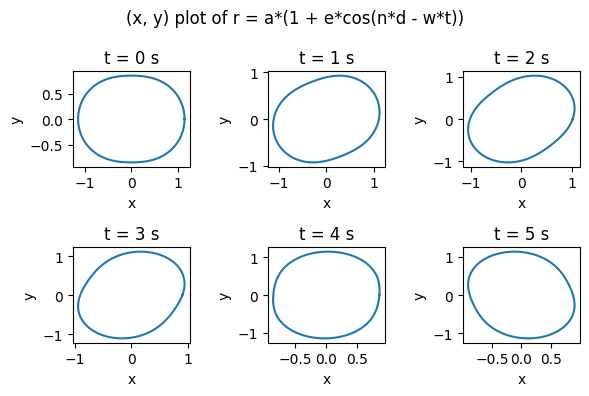

In [62]:
d = np.linspace(0, 2 * np.pi, 100)
t_values = [0, 1, 2, 3, 4, 5]
fig, axs = plt.subplots(2, 3, figsize=(6, 4))
fig.suptitle('(x, y) plot of r = a*(1 + e*cos(n*d - w*t))')
for i, t in enumerate(t_values):
    r = a * (1 + e * np.cos(n * d - w * t))
    x = r * np.cos(d)
    y = r * np.sin(d)
    ax = axs[i // 3, i % 3]
    ax.plot(x, y)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f't = {t} s')    
plt.tight_layout()
plt.show()

In [63]:
d = 0  #ANGLE 
#PRESSURE OVER THE BOUNDARY OF VORTEX

p = e * ρ0 * a**2 * (((Ω**2)/4) - (w - (n*Ω/2))**2) * math.cos(n*d - w*t)

[1.15       1.14999988 1.14999953 ... 1.14999953 1.14999988 1.15      ]
[1.10975333 1.10988174 1.11000998 ... 1.10949599 1.10962474 1.10975333]
[1.01061058 1.01079861 1.01098663 ... 1.01023446 1.01042253 1.01061058]
[0.90577396 0.90592071 0.90606761 ... 0.9054809  0.90562735 0.90577396]
[0.85150113 0.85152785 0.8515548  ... 0.85144839 0.85147464 0.85150113]
[0.8769161  0.87680845 0.87670099 ... 0.87713198 0.87702394 0.8769161 ]


/var/folders/5p/76f1x6j10cj9lxlz_v0xzpn40000gn/T/ipykernel_31300/4283685474.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  reversed_cmap = plt.cm.get_cmap(colormaps).reversed()


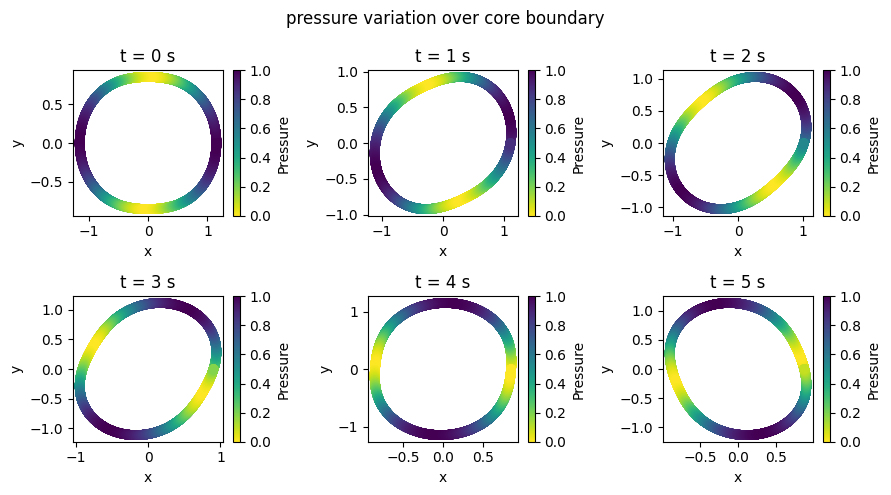

In [64]:
e = 0.15
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable

t_values = [0, 1, 2, 3, 4, 5]

d = np.linspace(0, 2 * np.pi, 10000)
colormaps = 'viridis'
fig, axs = plt.subplots(2, 3, figsize=(9, 5))
fig.suptitle('pressure variation over core boundary')

for i, t in enumerate(t_values):
    r = a * (1 + e * np.cos(n * d - w * t))
    print(r)
    x = r * np.cos(d)
    y = r * np.sin(d)
    color = e * ρ0 * a**2 * (((Ω**2)/4) - (w - (n*Ω/2))**2) * np.cos(n*d - w*t)
    normalized_color = (color - np.min(color)) / (np.max(color) - np.min(color))
    reversed_cmap = plt.cm.get_cmap(colormaps).reversed()
    ax = axs[i // 3, i % 3]
    scatter = ax.scatter(x, y, c=normalized_color, cmap=reversed_cmap)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f't = {t} s')

    sm = ScalarMappable(cmap=reversed_cmap)
    sm.set_array(normalized_color)
    cbar = fig.colorbar(sm, ax=axs[i // 3, i % 3])
    cbar.set_label('Pressure')

plt.tight_layout()
plt.show()

## Dipole sound intensity

In [65]:

n = 1  
w = (Ω/2)*(n - ((ρ1 - math.sqrt(n*(ρ0**2) - (n-1)*(ρ1**2)))/(ρ0 +  ρ1 )))

In [66]:
c0 = 343    # SOUND VELOCITY IN ABMIENT FLUID
U = (a*Ω)/2
M = U/c0    # MACH NUMBER

In [67]:
r = 2
d = 2*math.pi


#pressure behavior for (r,d), and n=1. 

P = 2 * e * ρ0 * (U**2) * math.sqrt(((math.pi * a * M)/r) * (ρ0/(ρ0+ρ1)) ) * ((ρ1 - ρ0)/(ρ1 + ρ0)) * math.cos(d - (math.pi/4) - w*(t - (r/c0)))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable
import math

t = 4  # Specify the desired value of t

r_values = np.linspace(0, 1, 20)
d_values = np.linspace(0, 2 * np.pi, 10000)

x_values = np.outer(r_values, np.cos(d_values))
y_values = np.outer(r_values, np.sin(d_values))
color = np.zeros_like(x_values)

# Calculate color values
for i, r in enumerate(r_values):
    for j, d in enumerate(d_values):
        if r == 0:
            color[i, j] = 0  # Set color to 0 for r=0 to avoid division by zero
        else:
            color[i, j] = 2 * e * ρ0 * (U**2) * np.sqrt(((np.pi * a * M) / r) * (ρ0 / (ρ0 + ρ1))) * ((ρ1 - ρ0) / (ρ1 + ρ0)) * np.cos(d - (np.pi / 4) - w * (t - (r / c0)))

fig, ax = plt.subplots()
scatter = ax.scatter(x_values, y_values, c=color.ravel(), cmap='viridis')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(f't = {t} s')

sm = ScalarMappable(cmap='viridis')
sm.set_array(color)
cbar = fig.colorbar(sm)
cbar.set_label('Pressure')

plt.show()


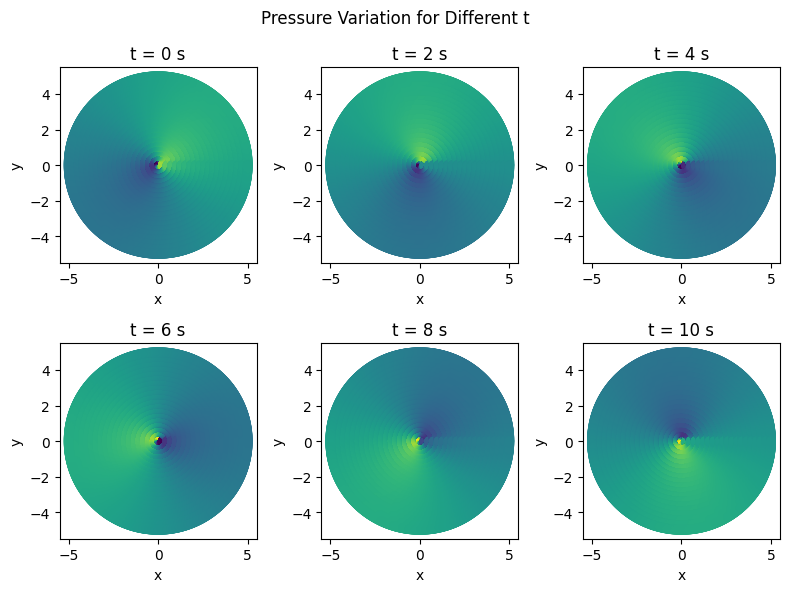

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable
import math

t_values = [0, 2, 4, 6,8,10]

r_values = np.linspace(0, 5, 20)
d_values = np.linspace(0, 2 * np.pi, 1000)

fig, axs = plt.subplots(2, 3, figsize=(8, 6))
fig.suptitle('Pressure Variation for Different t')

for i, t in enumerate(t_values):
    x_values = np.outer(r_values, np.cos(d_values))
    y_values = np.outer(r_values, np.sin(d_values))
    color = np.zeros_like(x_values)
    for j, r in enumerate(r_values):
        for k, d in enumerate(d_values):
            if r == 0:
                color[j, k] = 0 
            else:
                color[j, k] = 2 * e * ρ0 * (U**2) * np.sqrt(((np.pi * a * M) / r) * (ρ0 / (ρ0 + ρ1))) * ((ρ1 - ρ0) / (ρ1 + ρ0)) * np.cos(d - (np.pi / 4) - w * (t - (r / c0)))

    ax = axs[i // 3, i % 3]
    scatter = ax.scatter(x_values, y_values, c=color.ravel(), cmap='viridis')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f't = {t} s')

    sm = ScalarMappable(cmap='viridis')
    sm.set_array(color)
    

plt.tight_layout()
plt.show()


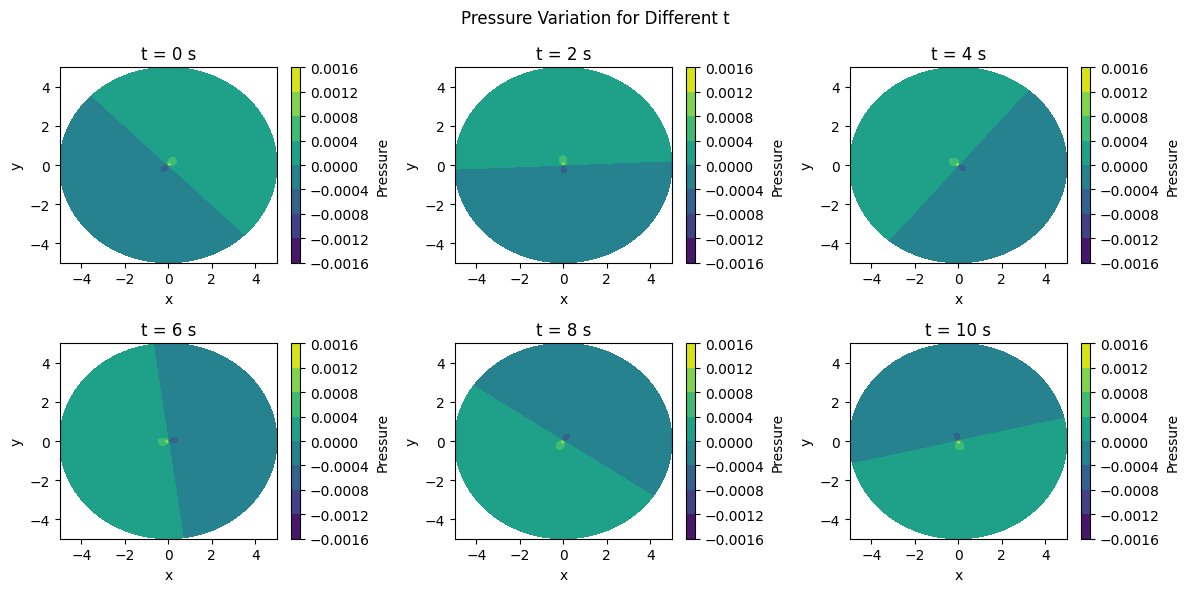

In [77]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable

t_values = [0, 2, 4, 6, 8, 10]

r_values = np.linspace(0, 5, 100)
d_values = np.linspace(0, 2 * np.pi, 1000)

fig, axs = plt.subplots(2, 3, figsize=(12, 6))
fig.suptitle('Pressure Variation for Different t')

for i, t in enumerate(t_values):
    x_values = np.outer(r_values, np.cos(d_values))
    y_values = np.outer(r_values, np.sin(d_values))
    color = np.zeros_like(x_values)
    for j, r in enumerate(r_values):
        for k, d in enumerate(d_values):
            if r == 0:
                color[j, k] = 0
            else:
                color[j, k] = 2 * e * ρ0 * (U**2) * np.sqrt(((np.pi * a * M) / r) * (ρ0 / (ρ0 + ρ1))) * ((ρ1 - ρ0) / (ρ1 + ρ0)) * np.cos(d - (np.pi / 4) - w * (t - (r / c0)))

    ax = axs[i // 3, i % 3]
    contours = ax.contourf(x_values, y_values, color, cmap='viridis')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f't = {t} s')

    cbar = fig.colorbar(contours, ax=ax)
    cbar.set_label('Pressure')

plt.tight_layout()
plt.show()
